In [1]:
# Importa as bibliotecas
import pandas as pd
import math
import numpy as np
import pandas_datareader.data as pdr
from matplotlib import pyplot as plt
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/e6/b3/388ab967a387cc92926f70e97688dd9a7189b29a0773db815ffc5289e2b5/yfinance-0.2.31-py2.py3-none-any.whl.metadata
  Obtaining dependency information for requests>=2.31 from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/928.0 kB ? eta -:--:--
     --- ----------------------------------- 71.7/928.0 kB 3.8 MB/s eta 0:00:01
     ------------ ------------------------- 307.2/928.0 kB 3.2 MB/s eta 0:00:01
     ----------------- -------------------- 430.1/928.0 kB 3.8 MB/s eta 0:00:01
     ----------------- -------------------- 430.1/928.0 kB 3.8 MB/s eta 0:00:01
     -------------------------------------- 928.0/928.0 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting r

In [2]:
# Ativos
symbols = ['ITUB4.SA']
# Importa os preços
preco = pdr.get_data_yahoo(symbols)['Adj Close']
# Obtém o número de observações do tempo
tempo = (preco.index[-1] - preco.index[0]).days
# Média dos retornos
media_retorno = preco.pct_change().mean()
# Desvio padrão dos retornos
desvio_retorno = preco.pct_change().std()
# A partir dos inputs, iremos gerar os valores aleatórios da simulação
print ("Retorno esperado : ", str(round(media_retorno, 4)))
print ("Desvio padrão : ", str(round(desvio_retorno, 4)))

[*********************100%%**********************]  1 of 1 completed
Retorno esperado :  0.0007
Desvio padrão :  0.0222


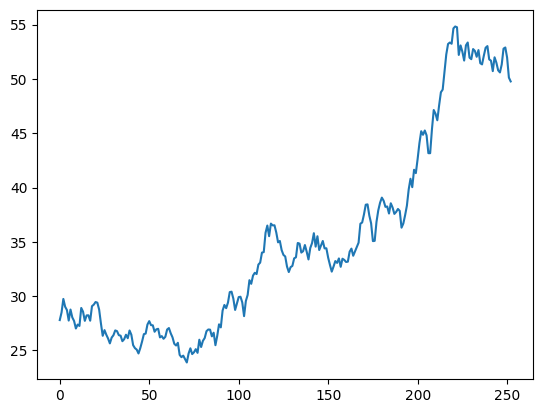

In [3]:
# Gera valores aleatório para 1 ano em dias úteis (252 dias) assumindo distribuição normal
retorno_diario_sim = np.random.normal(media_retorno, desvio_retorno, 252) + 1
# A partir do valores aleatórios futuros dos retornos, aplicamos no último valor do preço da ação
price_series = [preco[-1]]
for j in retorno_diario_sim:
    price_series.append(price_series[-1] * j)
 
 
 
 
plt.plot(price_series)

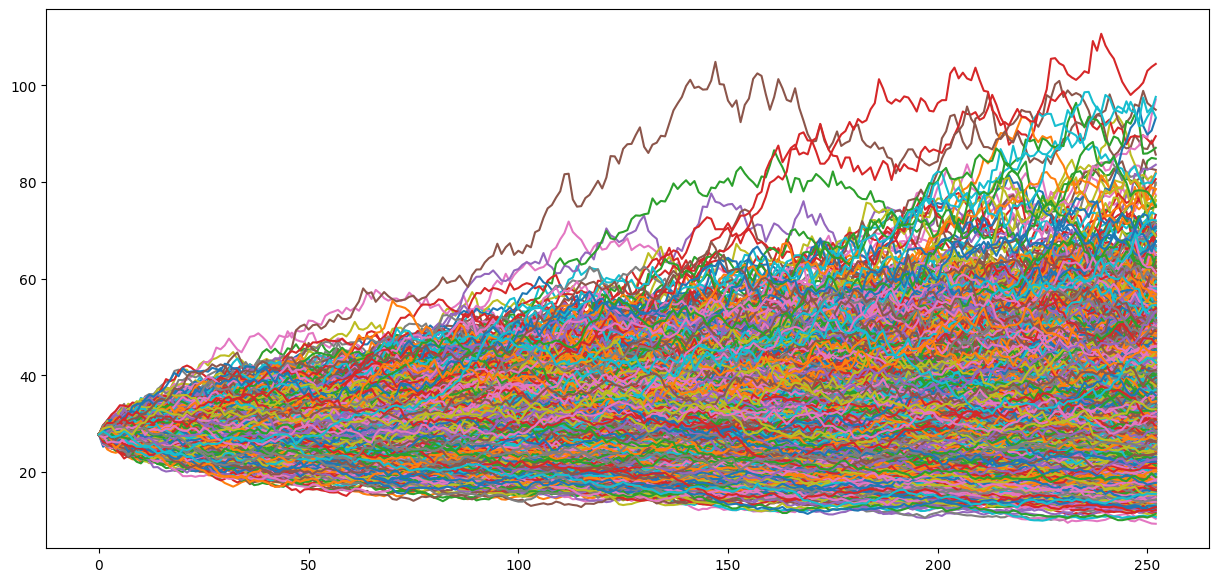

(array([  7.,  28.,  74., 111., 174., 202., 260., 293., 272., 247., 234.,
        205., 166., 123., 120.,  88.,  79.,  79.,  58.,  46.,  29.,  23.,
         16.,  12.,   8.,  11.,   6.,   5.,   4.,   6.,   3.,   2.,   2.,
          1.,   0.,   2.,   2.,   1.,   0.,   1.]),
 array([  9.32741784,  11.70477612,  14.0821344 ,  16.45949267,
         18.83685095,  21.21420923,  23.59156751,  25.96892578,
         28.34628406,  30.72364234,  33.10100062,  35.4783589 ,
         37.85571717,  40.23307545,  42.61043373,  44.98779201,
         47.36515028,  49.74250856,  52.11986684,  54.49722512,
         56.87458339,  59.25194167,  61.62929995,  64.00665823,
         66.38401651,  68.76137478,  71.13873306,  73.51609134,
         75.89344962,  78.27080789,  80.64816617,  83.02552445,
         85.40288273,  87.780241  ,  90.15759928,  92.53495756,
         94.91231584,  97.28967412,  99.66703239, 102.04439067,
        104.42174895]),
 <BarContainer object of 40 artists>)

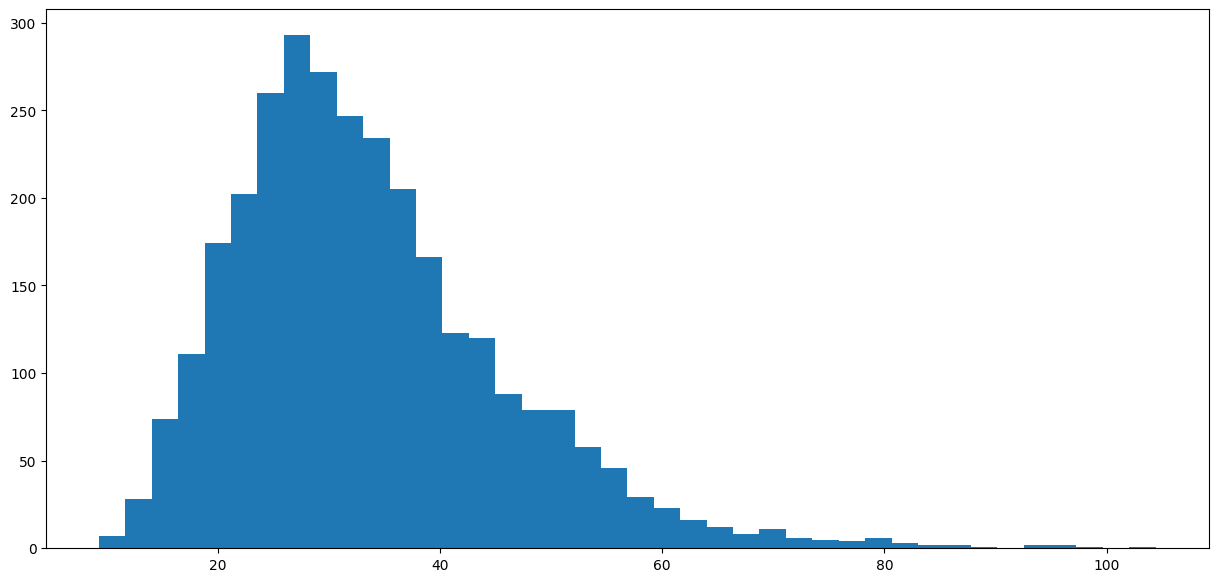

In [4]:
plt.figure(figsize = (15, 7))
# Cria várias simulações
numero_processos = 3000
precos_fechamento = []
for i in range(numero_processos):
    retorno_diario = np.random.normal(media_retorno, desvio_retorno, 252) + 1
    serie_precos = [preco[-1]]
    for j in retorno_diario:
        serie_precos.append(serie_precos[-1] * j)
 
    # anexa o último valor do preço
    precos_fechamento.append(serie_precos[-1])
    # plota
    plt.plot(serie_precos)
plt.show()
plt.figure(figsize = (15, 7))
# plota histograma
plt.hist(precos_fechamento,bins=40)

In [5]:
# Analisa o resultado médio de todos os preços simulados
media_final = round(np.mean(precos_fechamento),2)
print("Preço Esperado: ", str(media_final))

Preço Esperado:  33.61
